## Baysian Problems

<br>
University of Miami
<br>
REU summer 2022
<br>
Burton Rosenberg.
<br>
<br>last update: May 27, 2022


### Bayesian Statistics

This draws heavily from [Think Bayes](https://greenteapress.com/wp/think-bayes/) by Allen Downey. The code is from that book. A selection of similar problems are found on Prof. Downey's [All your Bayes are belong to us!](https://allendowney.blogspot.com/2011/10/all-your-bayes-are-belong-to-us.html) post and his [Blinky Monty Problem](https://allendowney.blogspot.com/2011/10/blinky-monty-problem.html) post.

The idea of Bayesian Statistics is probability understod as an expression of belief,

> In Baysian statistics, probably is analogous to belief. The higher the probablity the more one believes that the event is the case. It is the probability of the Weather Channel. Tomorrow will occur and it will occur only once &mdash; to say _"50 out of 100 times it was March 22nd, 2019,  it rained"_ makes no sense.

The mantra of Bayesnian statistics is that the subjectivity is captured in the _prior_. But once that subjectivity is accounted for, the rest is objective. Data will update that prior by providing supporting or refuting evidence, and the posterior probability reflects the rational person's belief, given the prior and the evidence.

Bayes Law calculates the new belief that <code>H<sub>i</sub></code> is the case given the prior of the probability of <code>H<sub>i</sub></code> and the occurence of event <code>D</code>,

> <code>P(H<sub>i</sub>|D) P(D) = P(D|H<sub>i</sub>) P(H<sub>i</sub>)</code>

the symbol <code>P(D|H<sub>i</sub>)</code> is called the _likelihood_. The value P(H<sub>i</sub>) is given, and typically the likelihood P(D|H<sub>i</sub>)  is easy to calculate. Of the hypothesis are constructed a certain way,  the probability <code>P(D)</code> can be easily calculated as well. 

If the <code>H<sub>i</sub></code> are mutually exclusive and collectively exhaustive, then <code>P(H<sub>i</sub>|D)</code> will sum to 1, hence

> <code>1 = Sum<sub>i</sub> P(D|H<sub>i</sub>) P(H<sub>i</sub>)/ P(D),</code> 

so

> <code>P(D) = Sum<sub>i</sub> P(D|H<sub>i</sub>) P(H<sub>i</sub>)</code>.

This is also known as the [Law of Total Probability](https://en.wikipedia.org/wiki/Law_of_total_probability).

So here is the method,

1. Starting with the probability vector <code>P(H<sub>i</sub>)</code>, either totall a priori or for the last update iteration,
1. Given observation <code>D</code> update each element of the vector by the likelihood of event `D` under hypothesis <code>H<sub>i</sub></code>.
1. Normalize the vector (this implicitly calculates `P(D)`).
1. After all observations (or at any point in the observation suite) make a decision based on the current values of the probability vector <code>P(H<sub>i</sub>)</code>.


## The M&M Problem

Solve the M&M Problem as given in Allen Downey, Think Bayes, [Section 1.6](http://www.greenteapress.com/thinkbayes/html/thinkbayes002.html#sec14).

The M&M problem is the problem of deciding the manufacturing year of a bag of M&M's: given two bags of M&M, one from 1994 and one from 1996, but it is unknown which is the '94 and which is the '96.

Between those two years, an M&M bag had different distributions of colors. So by drawing a sample M&M randomly from each bag, there might be a hint as to which bag came from which year.

In the extreme, because blue M&M's were introduced in 1995, if a blue was drawn from a bag, then we are certain of which bag was from '94 and which from '95. In less extreme situations we will need to calculate the advantage, if there is any, from the M&M drawing experiment.

__The hypthotheses__

The problem is to assert either H_1 or H_2, where H_1 is that the first bag is from '94 and the second from '96, and H_2 that the first bag is from '96 and the second from '94.

__A priori__

Because the bags are assigned to be the first or the second at random, the a priori probability distribution is P(H_1) = P(H_2) = 1/2.

__The experiment__

Here are the distribution of colors for the two years, 

| color | 1994 | 1996 |
|-------|------|------|
| brown |  .3 | .13 |
| yellow|  .2    | .14 |
| red | .2 | .13 |
| green | .1 | .20 |
| orange | .1 |  .16 |
| tan | .1 | 0 |
| blue | 0 | .24 |

Let D represent the outcome of the experiment, an event. An example of an event is "a yellow was drawn from the first bag, and a green was drawn from the second bag".

We can calculate P(D|H_i) for either hypothesis from the above table and the assumption that the draws were independent. In the case given, 

> P(D|H_1) = P(yellow from a 1994 bag) P(green from a 1996) = (.2)(.2) = .04

and

> P(D|H_2) = P(yellow from a 1996 bag) P(blue from a 1994) = (.14)(.1) = .014


__A Posteriori__

Bayes Law is crucial (and from where Bayesian Statistics gets the name). It says:

> P(H_i|D) = P(D|H_i) P(H_i) / P(D)

P(H_i) is called the prior; P(H_i|D) the posterior; and P(D|H_i) the likelihood.

The calculation of P(D) is possible given the two likelihoods using the law of total probability, given that H_1 and H_2 are mutually exclusive and mutually exhaustive (all cases of the world are exactly either H_1 or H_2, not neither, not both).

> P(D) = P(D|H_1) P(H_1) + P(D|H_2) P(H_2) = (.04)(.5) + (.014)(.5) = .027

so, 

> P(H_1|D) = (.04)(.5)/(.027) = .74

> P(H_2|D) = (.014)(.5)/(.027) = .26

__Conclusion__

H_1 is three times more likely than H_2. If one had to guess, then H_1 is correct &mdash; the first bag
is from 1994. (Does this make sense?)



## Exercise M and M's


In [1]:
class MandM:
    
    def __init__(self,dist_1994,dist_1996):
        self.d94 = dist_1994
        self.d96 = dist_1996
        self.prior = {'h1':0.5,'h2':0.5}
        
    def set_apriori(self):
        self.prior = {'h1':0.5,'h2':0.5}
        
    def likelihood(self, color_bag1, color_bag2):
        # returns the pair (P(D|H_1), P(D|H_2))
        
        likelihood_h1 = self.d94[color_bag1]*self.d96[color_bag2]
        likelihood_h2 = self.d96[color_bag1]*self.d94[color_bag2]
        return (likelihood_h1,likelihood_h2)
    
    def total_prob(self,likelihood):
        # given the pair (P(D|H_1), P(D|H_2)), 
        # return P(D) under the current prior distribution (self.prior)
        
        p_d = likelihood[0]*self.prior['h1'] + likelihood[1]*self.prior['h2']
        return p_d
    
    def posterior(self,likelihood):
        # given the lieklihoods (P(D|H_1), P(D|H_2)),
        # returns the posterior probability distribution (P(H_1),P(H_2)) (post hoc)
        # under the current prior distribution (self.prior)
        
        p_d = self.total_prob(likelihood)
        post_h1 = likelihood[0]*self.prior['h1']/p_d
        post_h2 = likelihood[1]*self.prior['h2']/p_d
        return (post_h1,post_h2)
    
    def experiment(self,color_bag1, color_bag2):
        likelihood = self.likelihood(color_bag1, color_bag2)
        posterior = self.posterior(likelihood)
        self.prior = {'h1':posterior[0], 'h2':posterior[1]}
        return self.decision()
    
    def decision(self):
        if self.prior['h1']>=self.prior['h2']:
            return 'h1'
        return 'h2'
    
    def __repr__(self):
        return f'h1: {self.prior["h1"]:.4f}, h2: {self.prior["h2"]:.4f}'
    

dist_1994 = {'brown':.3, 'yellow':.2, 'red':.2, 'green':.1, 'orange':.1, 'tan':.1, 'blue':0}
dist_1996 = {'brown':.13, 'yellow':.14, 'red':.13, 'green':.2, 'orange':.16, 'tan':0, 'blue':.24}

# test 1

print(f'the result should be |h1: 0.7407, h2: 0.2593|')
mandm = MandM(dist_1994,dist_1996)
mandm.experiment('yellow','green')
print(mandm)

# test 2

print(f'the result should be |h1: 0.0000, h2: 1.0000|')
mandm.set_apriori()
mandm.experiment('blue','yellow')
print(mandm)

the result should be |h1: 0.7407, h2: 0.2593|
h1: 0.7407, h2: 0.2593
the result should be |h1: 0.0000, h2: 1.0000|
h1: 0.0000, h2: 1.0000



## The Train Problem

We want to estimate the number of trains owned by a certain railroad company, given the observation of trains, and the train number. We know that the company numbers its trains consecutively starting with one. If we observe train 60, for instance, then we know that company owns at least 60 trains. We make several measurements and then provide a guess as to how many trains we haven't seen.

In this problem we assume that any possible train is just as likely to pass by. Hence if the hypothesis is that the company runs `h` trains, the likelihood to see train `m` is `1/h`, independent of `m`.

We keep a probability distribution over all hypothesis, and with each observation we update this distribution, by applying the likelihood that that train would be observed under that hypothesis.

This problem considers two priors. One prior is a _uniform distribution_ over a range from 1 to n. That is, we assume there are some number of trains, but never more than n, and we have no preference for one number of trains compared to another.  This results in some answer. However, things being what they are, it seems silly to think that there is a magic n, and all train companies choose a number uniformly between 1 and n, and that's the number of trains they run. 

We will consider other prior's later on.

__Hypothesis__

For a given n, the hypothesis are H_i for i=1 through n, the probability that the train company owns i trains.

__A priori__

We declare that H_i = 1/n. Of all possibilities, we are indifferent to how many trains the company might own.

__The Experiment__

And even D is of the form "train j was seen". Write this as D=j. The formula for the likelihood 
gives two cases,

> If j &gt; i, P( D=j | H_i ) = 0. This is impossible.

> If i &ge; j, P( D=j | H_i ) = 1/n. Any of the trains is equally likely.

__The posterior__

To calculate P(D), needed for Bayes, the formula would be, 

> P(D) sum_i P( D=j | H_i) P(H_i)

from were we get the new distribution on H_i, 

> P(H_i|D) = P(D|H_i) P(H_i) / P(D)





__Maximum Likelihood Criteria__

Given the distribution of probabilities for each hypothesis, we next consider what our answer will be. 

The general thing to do is maximum likelihood estimation. Among all the H_i, look for the one with the greatest probability. This is what was done for the M&M problem. However the rule fails us here.

As you can see, the maximum likelihood estimation rule would result in us always deciding the the number of trains owned by the company is equal to the largest train number that we have seen. This is betting that in the limited number of obserations we have made, we managed to see a very specific train &mdash; that with the largest number.

So we need a different decision criteria. Implement for an example criteria the mean of the distribution.


## Exercise the Train Problem

In [2]:
import numpy as np

class Train:
    
    def __init__(self,prior):
        # prior[i] is the probability of H_i, the company owns i trains
        # prior[0]==0. The company owns at least one train
        self.prior = prior
        self.n = len(prior)-1
        
    @staticmethod
    def uniform_prior(n):    
        unif_prior = (1/n)*np.ones(n+1)
        unif_prior[0] = 0
        return unif_prior

    def sum_priors(self):
        return np.sum(self.prior)

    def set_apriori(self,n):
        self.prior = Train.uniform_prior(n)
        self.n = len(prior)-1
        
    def likelihood(self,train_number):
        # what is the likelihood of seeing train number train_number
        # under the current prior, for each H_i
        # the trains are numbered 1, 2, 3 ... n
        
        assert train_number>0
        lh = np.zeros(self.n+1)
        for i in range(1,self.n+1):
            if train_number>i:
                lh[i] = 0
            else:
                lh[i] = 1/i
        return lh

    def total_probability(self,likelihood):
        # given the condition distribution P(D|H_i), i=1...,n
        p_d = 0.0
        for i in range(1,self.n+1):
            p_d += likelihood[i]*self.prior[i]
        return p_d
    
    def posterior(self,likelihood):
        # given the likelihoods returns a distribution P(H_i) i=1..n
        # of the posterior probabilities under the current prior
        
        prob_d = self.total_probability(likelihood)
        post = np.zeros(self.n+1)
        for i in range(1,self.n+1):
            post[i] = likelihood[i] * self.prior[i] / prob_d
        return post

    def experiment(self,train_number):
        likelihood = self.likelihood(train_number)
        posterior = self.posterior(likelihood)
        self.prior = posterior
        return self.decision()

    def decision(self):
        values = np.array([i for i in range(self.n+1)])
        return np.sum(self.prior*values)/self.n


we believe the company has about 0.55 trains.


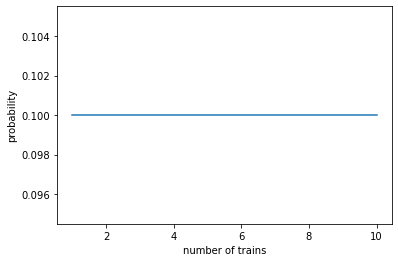

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt


n = 10
train = Train(Train.uniform_prior(n))
print(f'we believe the company has about {train.decision()} trains.')

plt.plot([i for i in range(1,n+1)],train.prior[1:])
plt.xlabel("number of trains")
plt.ylabel("probability")
plt.show()



we believe the company has about 0.6388989496559218 trains.


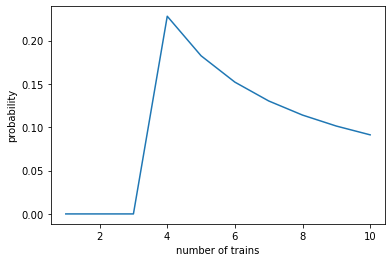

In [4]:
print(f'we believe the company has about {train.experiment(4)} trains.')
plt.plot([i for i in range(1,n+1)],train.prior[1:])
plt.xlabel("number of trains")
plt.ylabel("probability")
plt.show()



we believe the company has about 0.5807561485586937 trains.


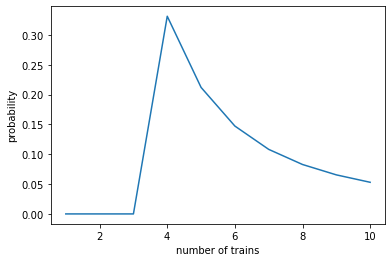

In [5]:
print(f'we believe the company has about {train.experiment(4)} trains.')
plt.plot([i for i in range(1,n+1)],train.prior[1:])
plt.xlabel("number of trains")
plt.ylabel("probability")
plt.show()


we believe the company has about 0.8063020733888215 trains.


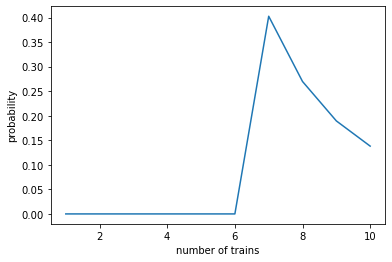

In [6]:
print(f'we believe the company has about {train.experiment(7)} trains.')
plt.plot([i for i in range(1,n+1)],train.prior[1:])
plt.xlabel("number of trains")
plt.ylabel("probability")
plt.show()


### End of Notebook